In [5]:
import os, sys
import matplotlib.pyplot as plt
import requests
from datetime import timedelta

# 0. Make sure we're in the project root
# Adjust the path if needed
os.chdir(os.path.expanduser("~/stock-forecasting-llm-aapl"))

# 1. Add project root to Python path so `src` is importable
project_root = os.getcwd()
if project_root not in sys.path:
    sys.path.append(project_root)

# 2. Now imports from src work
from src.data import load_data
from config import STOCK_SYMBOL, START_DATE, END_DATE


[*********************100%***********************]  1 of 1 completed


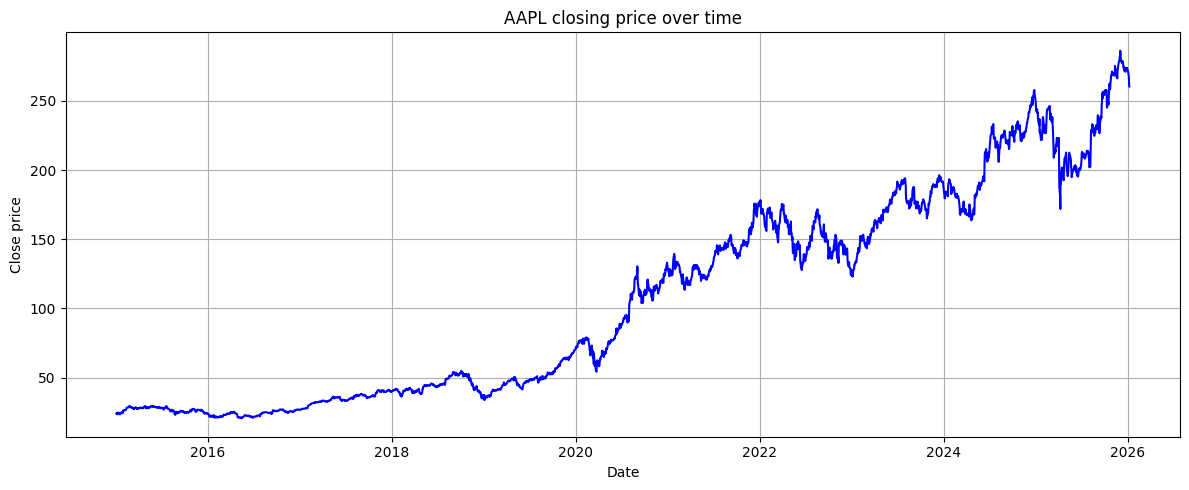

In [12]:
# Historical timeline for AAPL

df_hist = load_data(STOCK_SYMBOL, START_DATE, END_DATE)
df_hist = df_hist.sort_index()  # ensure dates in order

plt.figure(figsize=(12, 5))
plt.plot(df_hist.index, df_hist["Close"], color="blue")
plt.title(f"{STOCK_SYMBOL} closing price over time")
plt.xlabel("Date")
plt.ylabel("Close price")
plt.grid(True)
plt.tight_layout()
plt.show()



[*********************100%***********************]  1 of 1 completed


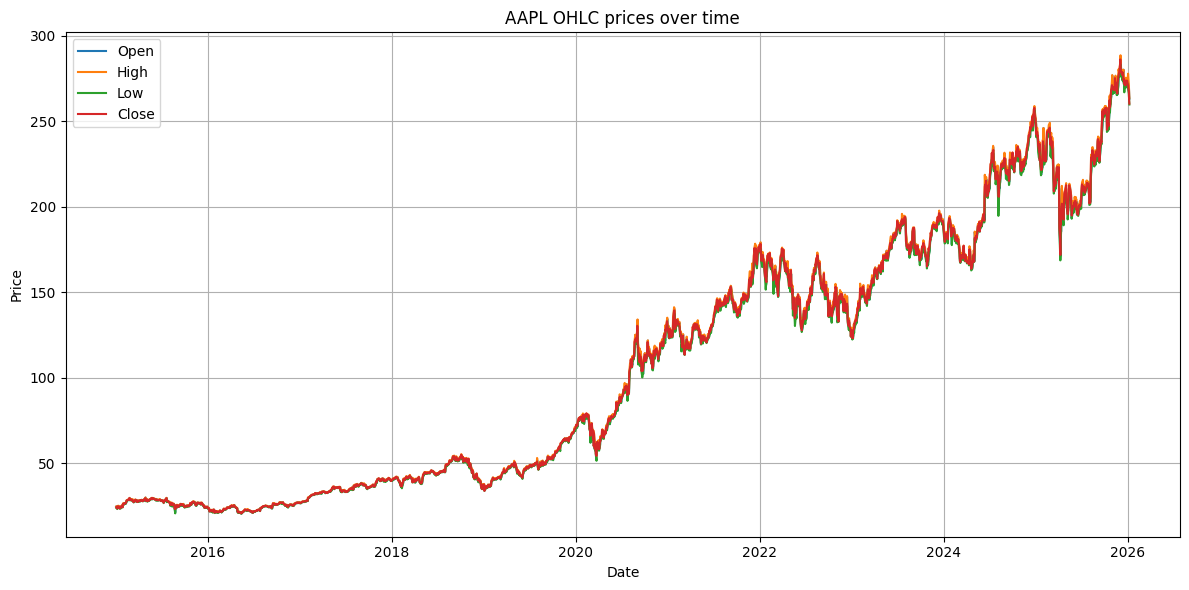

In [13]:
df_hist = load_data(STOCK_SYMBOL, START_DATE, END_DATE)
df_hist = df_hist.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(df_hist.index, df_hist["Open"],  label="Open")
plt.plot(df_hist.index, df_hist["High"],  label="High")
plt.plot(df_hist.index, df_hist["Low"],   label="Low")
plt.plot(df_hist.index, df_hist["Close"], label="Close")

plt.title(f"{STOCK_SYMBOL} OHLC prices over time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


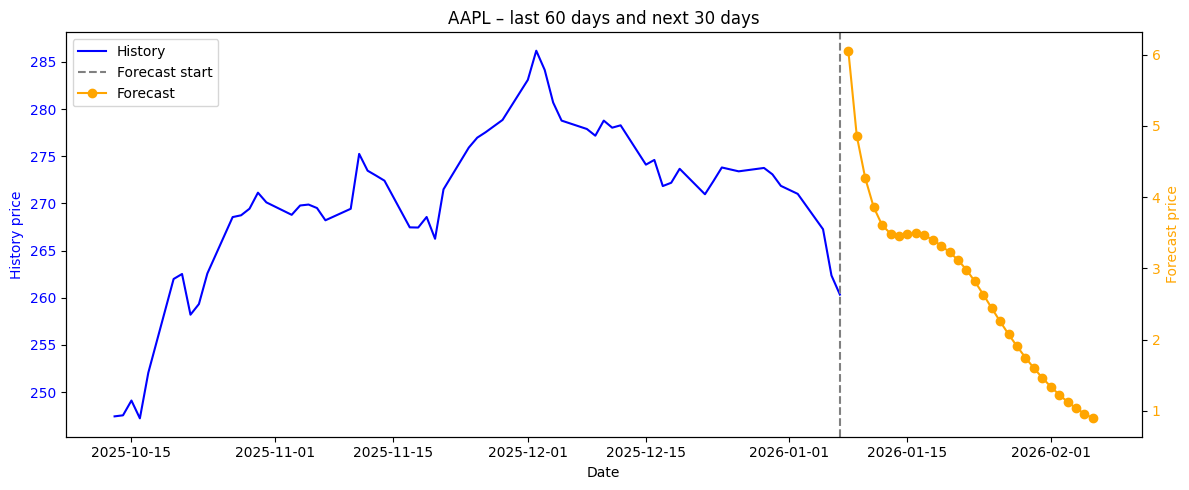

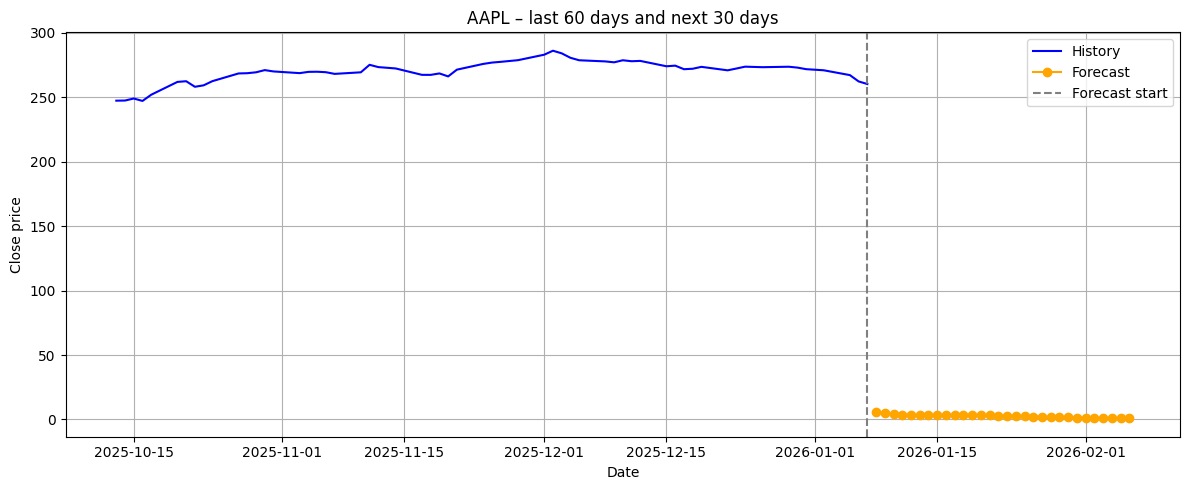

In [11]:
# 0. One‑time setup in first cell
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Data + API
df_hist = load_data(STOCK_SYMBOL, START_DATE, END_DATE)

# Call API for 30‑day forecast
resp = requests.post(
    "http://localhost:8000/multi_horizon_forecast",
    json={"ticker": "AAPL", "days": 30},
)
data = resp.json()
horizons = data["horizons"]
forecasts = [(h["horizon"], h["forecast"]) for h in horizons]

# Dual‑axis time‑series plot
df_tail = df_hist.sort_index().iloc[-60:]
last_date = df_tail.index[-1]

future_dates = [last_date + timedelta(days=h) for h, _ in forecasts]
future_values = [v for _, v in forecasts]

fig, ax1 = plt.subplots(figsize=(12, 5))

# Left y‑axis: history
ax1.plot(df_tail.index, df_tail["Close"], label="History", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("History price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.axvline(last_date, color="gray", linestyle="--", label="Forecast start")

# Right y‑axis: forecast
ax2 = ax1.twinx()
ax2.plot(future_dates, future_values, label="Forecast", color="orange", marker="o")
ax2.set_ylabel("Forecast price", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.title(f"{STOCK_SYMBOL} – last 60 days and next 30 days")
fig.tight_layout()
plt.show()


# 3. Call it
plot_30_day_forecast(df_hist, forecasts)


[*********************100%***********************]  1 of 1 completed


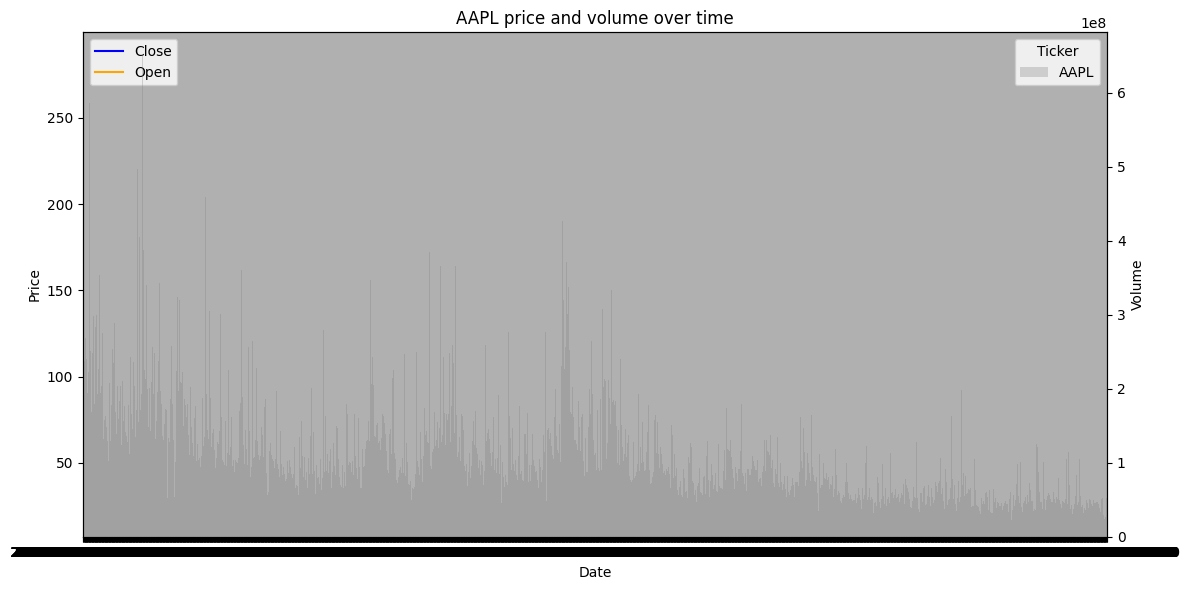

In [15]:
df_hist = load_data(STOCK_SYMBOL, START_DATE, END_DATE)
df_hist = df_hist.sort_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Prices (line)
ax1.plot(df_hist.index, df_hist["Close"], label="Close", color="blue")
ax1.plot(df_hist.index, df_hist["Open"],  label="Open",  color="orange")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.legend(loc="upper left")
ax1.grid(True)

# Volume (bars) using pandas, on second axis
ax2 = ax1.twinx()
df_hist["Volume"].plot(
    kind="bar",
    ax=ax2,
    alpha=0.3,
    color="gray",
    width=1.0,
    label="Volume",
)
ax2.set_ylabel("Volume")

plt.title(f"{STOCK_SYMBOL} price and volume over time")
fig.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


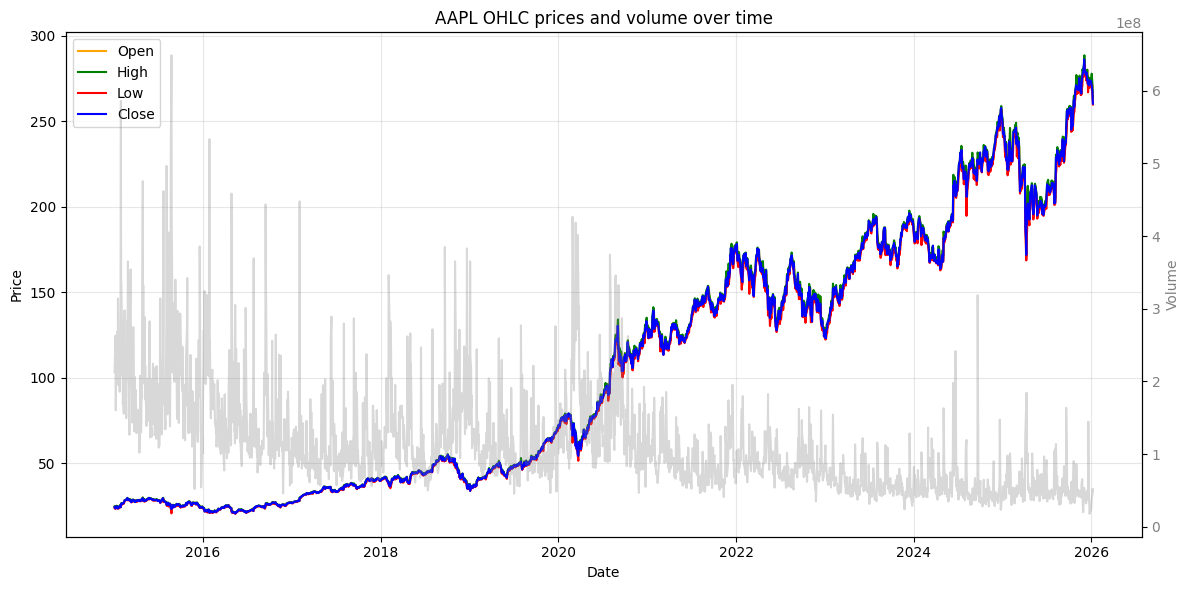

In [17]:
df_hist = load_data(STOCK_SYMBOL, START_DATE, END_DATE)
df_hist = df_hist.sort_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Price lines (primary y-axis)
ax1.plot(df_hist.index, df_hist["Open"],  label="Open",  color="orange")
ax1.plot(df_hist.index, df_hist["High"],  label="High",  color="green")
ax1.plot(df_hist.index, df_hist["Low"],   label="Low",   color="red")
ax1.plot(df_hist.index, df_hist["Close"], label="Close", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.legend(loc="upper left")
ax1.grid(True, alpha=0.3)

# Volume as a thin grey line on second axis
ax2 = ax1.twinx()
ax2.plot(df_hist.index, df_hist["Volume"], color="gray", alpha=0.3, label="Volume")
ax2.set_ylabel("Volume", color="gray")
ax2.tick_params(axis="y", labelcolor="gray")

plt.title(f"{STOCK_SYMBOL} OHLC prices and volume over time")
fig.tight_layout()
plt.show()


In [4]:
pip install yfinance


  Using cached yfinance-1.0-py2.py3-none-any.whl.metadata (6.0 kB)
  Using cached multitasking-0.0.12-py3-none-any.whl
  Using cached frozendict-2.4.7-py3-none-any.whl.metadata (23 kB)
  Using cached curl_cffi-0.13.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (13 kB)
  Using cached websockets-15.0.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.8 kB)
Using cached yfinance-1.0-py2.py3-none-any.whl (127 kB)
Using cached curl_cffi-0.13.0-cp39-abi3-macosx_11_0_arm64.whl (3.0 MB)
Using cached frozendict-2.4.7-py3-none-any.whl (16 kB)
Using cached websockets-15.0.1-cp312-cp312-macosx_11_0_arm64.whl (173 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [yfinance]━━ 5/6 [yfinance]
Note: you may need to restart the kernel to use updated packages.
